<div class="alert alert-block alert-info">

**Accessibility of the notebook:**
- You can adjust the width of the text with the function provided below. Copy it into a new code cell and execute it using the `ipykernel`.
    ```python
    from IPython.core.display import HTML
    def set_width(width):
        display(HTML(f"""<style>  
                .container {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} 
                .jp-Cell {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} </style>"""))
    # Set container width to X% of the fullscreen 
    set_width(50)
    ```
- You can toggle the auto-numbering of the sections in the outline toolbox (sidebar or topbar).
- You can toggle the code line numbers in the dropdown menu of the "view" button in the topbar. 
- You can collapse/expand a cell by clicking the blue bar on the left side of the cell.

</div>

In [ ]:
from IPython.core.display import HTML
def set_width(width):
    display(HTML(f"""<style>  
            .container {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} 
            .jp-Cell {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} </style>"""))
# Set container width to X% of the fullscreen 
set_width(50)

Experiments of this week:
- experiment 3A: build and design RC and RL circuits and observe their behaviour
- experiment 3B: use scope probes and see when it is beneficial to use them
- experiment 3C: cause a ground loop and explain how it is happening

Goal: learn how to design simple filters and how equipment you use affects your measurements

Structure of an experiment:
- Predict + Stimulate (25+10+20): per person. This is homework and should be finished **before** you start your 4 hours practicum session
- Build + Measure (15+30+10): with your partner(group of 2)
- Evaluate (15 min): with a group of 4(per table)

# 3A: Filtering 


> <font color='blue'>Learning goal:</font> Understand the dB-scale and the relation between Vout/Vin and frequency for a high pass filter. Simulate a RL circuit, and perform transient and frequency analysis. Build a RC circuit and find its -3dB point and Vout spectrum


## BACKGROUND
> <font color='grey'>⏳ Estimated time: 25 min</font>

The response of a capacitor or inductor to supplied voltage is not instant, it is out of phase. Therefore we do not speak about resistance values, but of (complex) impedance values. These impedance are frequency dependent, capacitors are slow, while inductors are pretty fast: 
- The complex impedance of an inductor is $j \omega L$.
- The complex impedance of an capacitor is $\frac{1}{j \omega C}$.

What is relevant from complex numbers for our course:
- $j^2$=-1 or $i^2$=-1
- therefore $-j=\frac{1}{j}$
- the absolute value of a complex number $a+ib$ is the square root of the complex number times it complex conjugated: <br>  $|a+ib|$=$\sqrt{ (a+ib)(a-ib)}$=$\sqrt{a^2+b^2}$


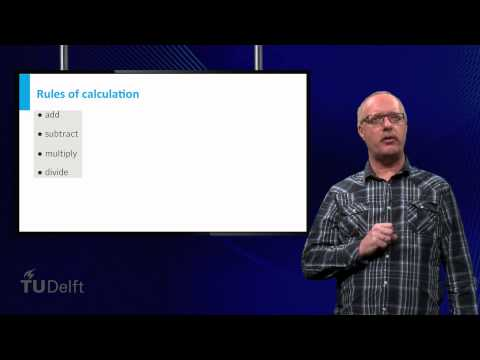

In [2]:
## very basic intro to complex numbers (EWI -TUDelft - pre-university Calculus)

from IPython.lib.display import YouTubeVideo
YouTubeVideo('sxGWOkKdwdM', width = 600, height = 450)

Impedances can be used in a similar way as a voltage divider, to derive the behavior of a filter. A filter in its simplest form is a combination of a resistor and capacitor or inductor. For a filter with $L_1$ and $R_1$ (instead of $R_1$ and $R_2$ for a voltage divider), $V_{out}$ measured over $L_1$ is equal to $\frac{Z_{L_1}}{{(R_1+{L_1})}}$. 

The biggest difference is the frequency dependency. Low pass filters block high frequencies, and simlarly high pass filters block low frequencies. 

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/72f7c30357b9caa07cefd5a8c79735c2e179be67/LTS/LTS2-RL_circuit.JPG" width=30%></img>


Whether you have a low or high pass filter can be found by using the following steps:
* first derive $\frac{V_{out}}{V_{in}}$ as function of R,C,L, and $\omega$. 
* derive the behavior of really small $\omega$ (going to zero)
* derive the behavior of really high $\omega$ (going to infinity)
* find out where the -3 dB point is, which is where (in case of the voltage of a sine) $V_{out}=\frac{V_{in}}{ \sqrt(2)}$



Watch the following videos to familiarize yourself with the subject, run the code to access the Youtube movies:

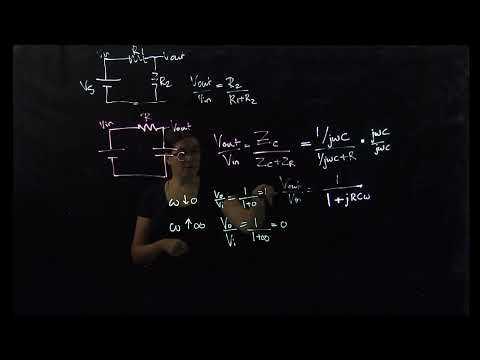

In [1]:
## RC low pass filter

from IPython.lib.display import YouTubeVideo
YouTubeVideo('ZwetQNcP0c8', width = 600, height = 450)

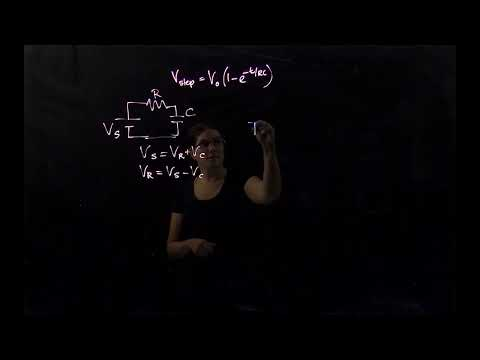

In [1]:
## derivation Voltage in an RC circuit (power of e)

from IPython.lib.display import YouTubeVideo
YouTubeVideo('jDB2d8zPK9w', width = 600, height = 450)

You can also visit the accompanying videos from the book (https://mediaplayer.pearsoncmg.com/assets/AMr8ons5dqRh8jQZjbzyF3wtRzgjkF6g) 

Decibel is a scale which looks at the order rather than the absolute value. Electronic engineers love it. You take the log10, and scale it with 20 (10 for 'deci', and 2 for power depending on the square of the voltage). 
You can calculate it with the code below. Try the dB of 2,4,10 and 100, and figure out the relation between a multiplying a signal and something else in decibel.

Also good to know: Octave is doubling of the frequency, decade is 10x the frequency. 

In [1]:
import numpy as np
value=10 # try 2,4,10,100
print(20*np.log10(value))

20.0


## ANTICIPATE: a RL circuit
> <font color='grey'>⏳ Estimated time: 10 min</font>

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/72f7c30357b9caa07cefd5a8c79735c2e179be67/LTS/LTS2-RL_circuit.JPG" width=30%></img>


* Derive what type of filter this (above circuit) is? High-pass or low-pass?
* What is its corresponding $L/R$ time?

> __<font color='blue'>Hint:</font>__
You should find an L/R-time in the order of microseconds.

In [ ]:
### TO DO="your answer for L/R and the type of filter"


## SIMULATE: a RL circuit and preform transient and frequency analysis 
> <font color='grey'>⏳ Estimated time: 20 min</font>

First read the transient analysis, including adapting the voltage source, from the intro manual:
https://mwdocter.github.io/TeachBook/main/EI_manuals/intro_LTSpice_old.html



### Simulate 1:
Build the above schematic in LTSpice, and plot Vin, Vout and I(R).
* Use settings: stop time 100u, time to start 0, maximum timesteps 1000. This results in the following analysis configuration: '.tran 0 100u 0 1000'
* Run the transient simulation (with correct settings), and upload the screenshot. 
* Explain the behavior of Vout and I(R) in words.
* What does Vout look like for larger and smaller values of R (500 Ohm or 50 kOhm)? Upload a screenshot.


In [ ]:
from ipywidgets import FileUpload
from IPython.display import Image

upload=FileUpload()
upload

In [ ]:
file_name="3A_1_simulationAC.jpg"
if upload.value!={}:
    with open(file_name,"wb") as f:
        try: f.write(upload.data[-1]) # python 3.7 Kernel code, not working on Vocareum
        except: f.write(upload.value[-1]["content"])  # python 3.8 Kernel code, works on Vocareum if you change the kernel

Image(filename=file_name, width="50%")

In [ ]:
upload


In [ ]:
file_name="3A_2_simulationAC_resistor_changed.jpg"
if upload.value!={}:
    with open(file_name,"wb") as f:
        try: f.write(upload.data[-1]) # python 3.7 Kernel code, not working on Vocareum
        except: f.write(upload.value[-1]["content"])  # python 3.8 Kernel code, works on Vocareum if you change the kernel

Image(filename=file_name, width="50%")

In [ ]:
### TO DO="your answer for 1. Explain the behavior of Vout and I(L1) in words"


### TO DO="your answer for 2. what changes for larger/smaller R?"


> <font color='red'>**Optional challenge**</font>
Feel free to explore the exchange of positions of R and L in the above schematic

### Simulate 2:

**remember to set your R value back to 5k Ohm**
First read the AC analysis, including how to adapt the voltage source, from the intro manual:
https://mwdocter.github.io/TeachBook/main/EI_manuals/intro_LTSpice_old.html

* Use settings: type sweep decade, number of points 100, start frequency 10, stop frequency 1Meg. This results in the following analysis configuration: '.ac dec 100 10 1Meg'
* Run the AC analysis simulation (with correct settings). 

* Show Vout, and with the cursor find the cutoff (-3dB) frequency. Upload a screenshot.
* Does the frequency at the -3 dB point correspond to the cutoff frequency that you can find from the L/R time? (If not, what went wrong?)
> __<font color='blue'>Hint:</font>__
Your frequency should be around 1.1E5 Hz (don't forget the factor of 2pi)


In [ ]:
upload

In [ ]:
file_name="3A_3_freq_dependency.jpg"
if upload.value!={}:
    with open(file_name,"wb") as f:
        try: f.write(upload.data[-1]) # python 3.7 Kernel code, not working on Vocareum
        except: f.write(upload.value[-1]["content"])  # python 3.8 Kernel code, works on Vocareum if you change the kernel

Image(filename=file_name, width="50%")

In [ ]:
### TO DO="your answer"



Feel free (to view or to skip) the following movie to see whether your simulation went correctly

In [ ]:
##precap
from IPython.lib.display import YouTubeVideo
YouTubeVideo('4pVcAYFlJns', width = 600, height = 450)


> <font color='red'>**Optional challenge**</font>
Go back to the time response, and derive the L/R time from the intensity versus time graph



In [ ]:
### TO DO (optional)="your answer (optional)"



> ### <font color='red'>Additional Python code for simulating the step response of an RL circuit</font>

In [ ]:
## The following code might be of some help.
## It simulates the response of an RL circuit to a step function at t=0.
import matplotlib.pyplot as plt
import numpy as np
# Increase font size
from matplotlib import rcParams
rcParams.update({'font.size': 12}) 

# Calculate V and I
tt=np.arange(0,100,0.1)
LR = 10
I=1-np.exp(-tt/LR) # I is found from the differential 
# equation given by Kirchoff's voltage law
V=np.exp(-tt/LR) # V = dI/dt

plt.figure(figsize=(8,4))
# Plot V
plt.subplot(1,2,1),plt.plot(tt,V)
plt.xlabel('t'), plt.ylabel(r'$V_{L}/V_{source}$')
# Plot I
plt.subplot(1,2,2),plt.plot(tt,I),
plt.xlabel('t'), plt.ylabel(r'$I/I_0$') # I_0 = V_source/R
# Optimal layout for subplots
plt.tight_layout()

Feel free to watch the following movie to get a quick intro in what you will be doing in the measurements

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('0h4zvkrEmks', width = 600, height = 450)

## IMPLEMENT & INVESTIGATE 1: Design a RC high pass filter
> <font color='grey'>⏳ Estimated time: 15 min</font>

We continue building a **high pass** filter, but now with a resistor R and capacitor C. First think about it, answer the following questions before implementing the circuit. 
- draw the schematic (including R, C, Vout, Vin)
- derive the formula for Vout/Vin ratio
- describe how does the filter behave at the extremes
- for R=1k$\Omega$ and C=33nF calculate:
    * cut-off frequency of the -3dB point
    * value of the time constant
- calculate the value of the slope (in dB) for voltage vs frequency graph(draw the graph).

In [1]:
### TO DO=" your answer, derivation ,explanation, and calculation"




Place to upload the drawing of your schematic

In [2]:
from ipywidgets import FileUpload
from IPython.display import Image
import os
upload=FileUpload()
upload


FileUpload(value={}, description='Upload')

In [3]:
file_name="3A_4_RC_high_pass.jpg"
if upload.value!={}:
    with open(file_name,"wb") as f:
        try: f.write(upload.data[-1]) # python 3.7 Kernel code, not working on Vocareum
        except: f.write(upload.value[-1]["content"])  # python 3.8 Kernel code, not working on Vocareum

Image(filename=file_name, width="50%")


FileNotFoundError: [Errno 2] No such file or directory: '3A_1_RC_high_pass.jpg'

## IMPLEMENT & INVESIGATE 2: find -3dB point of the RC circuit using test board 1
> <font color='grey'>⏳ Estimated time: 30 min</font>

### Equipment: 
- test board 1
- function generator
- oscilloscope
- coax cables
- wires

Implement the RC circuit with R=1 kΩ and C=33 nF. Below you can see the overview of test board 1.

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/ELC/ELC%20testboard1.jpg" width=50%></img>


* Use R3 (1 kΩ) and C4 (33 nF). 
* Use BNC1 to connect to the generator (use BNC T so you can connect 2 coax cables to generator output). 
* Use BNC2 to connect to channel 2 (CH2) of the scope. 
* Connect channel 1 (CH1) of the scope to the output of the generator.

> __<font color='blue'>Hint:</font>__ Make sure you are connecting the Vin to the "signal" part of BCN not the "ground" part when building the circuit on the board. Long arm is the "signal" while short arm is the ground! If you don't understand, check the week 1 setup to see how you connected to BCN

If you need more help with the setup, check experiment 1A and 1B for information how to connect equipment together.



### Settings:
Set the function generator to 10 kHz, 1.5 Vpp sine wave, 
## **remember to check if output setup setting is correct**!!!!!!!

Set the osciloscope to 0.2 V/div and 50 us/div.

On the oscilloscope screen you should see 2 signals (CH1 and CH2) that both show  a sine wave with a peak-to-peak value of  around 7.5 divisions, as indicated in the picture below.
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/ELC/3A_wave_on_scope_screen.jpg" width=30%></img>

On both scope channels the offset should be 0!


### Exercise: 
Now decrease the 
**signal frequency** to find Vpp=1.06V (or 5 divisions height of your sine). That is your -3dB point.

Do not decrease the voltage on function generator
> **<font color='blue'>__Hint__: </font>**
You should find a frequency of a few kHz as -3dB point. 
* Does it agree with the value you calculated in predition?
* What is the phase difference between Vin and Vout(it might be hard to see)?

In [ ]:
### TO DO="your answer: found -3dB frequency and phase"


## IMPLEMENT & INVESTIGATE 3: measure Vout spectrum
> <font color='grey'>⏳ Estimated time: 10 min</font>

Now you will use your setup to find how voltage spectrum changes with frequency

### Exercise:
You will start with -3dB frequency you have found. Record the Vout for it both in Volts(V) and Decibels(dB) and write them down in the table below. Replace frequency with your frequency values. Then repeat for halved frequency value.

> **<font color='blue'>__Hint__: </font>** In case you triggered on a channel instead of using external trigger, the signal might become too low to trigger at. Then you should switch trigger source, or (less favourable) adapt the trigger threshold. 

You might want to explore the following features of the scope to find Vout easier:
- measure > CH2 > Vpp: this will accurately readout subdivisions of the voltage level
- cursors > be able to move a cursor along the measured voltage and return V and t of that cursor


To edit the table doubleclick on it.

Frequency |Vout |Decibles
-----|-----|----- 
 f(-3dB)|?|?
f(-3dB)/2|?|?
f(-3dB)/4|?|?
f(-3dB)/8|?|?

* What behaviour do you observe? 
* Is dB decrease constant?

> **<font color='blue'>__Hint__: </font>**
You should find a relatively low value for the first constant, while the others are slightly higher. What is "special" about this first constant? Think about the loglog-plot for Vout/Vin and frequency which you derived in the homework.
>- you might want to import numpy as np and use np.log10 to calculate it using python instead doing it by hand

In [ ]:
### TO DO="your answer:explanation - dB constant (or not)."


In [ ]:
import numpy as np
print(20*np.log10(10/1))
### TO DO="use 20*np.log10 to find the number of dB per octave"


###            testboard 1 will be used in 3B, so you can leave it at your table

## COMPARE & CONCLUDE
> <font color='grey'>⏳ Estimated time: 15 min</font>

* Wait till all (4) group members finish their observation
* Compare your results with your other group members. 
* If your results agree, and are in line with all predictions, then talk to a TA and get checked off
* Otherwise, so if your results do not agree, or your results are not in line with your predictions, then first discuss amongst your group before getting a TA. 


**to be checked off by a TA:**
1. Schematics of the high pass LR (simulated) and RC (measured) filter: do you measure over R,L,or C?
2. Value for -3dB frequency and measured slope (in dB) for high pass filter. 
3. exit card: 1. Write a brief abstract on what you learned (conclusion, useful graph), 2. Which troubleshooting skills do you want to remember for next sessions, 3. Which code do you copy for use in next sessions,
4. How do think this notebook could be improved

In [1]:
#3A RC-RL
### TO DO="1. schematic high pass, measure over E=R,L, or C?"

### TO DO="2. -3dB frequency and slope in dB?"

### TO DO="3a. abstract"

### TO DO="3b. troubleshooting"

### TO DO="3c. code"

### TO DO="4. what changes would you suggest?"


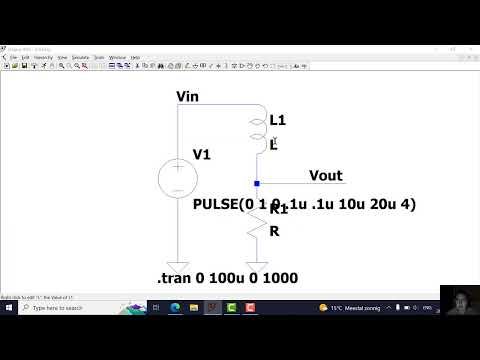

In [1]:
## recording LTSpice simulation
from IPython.lib.display import YouTubeVideo
YouTubeVideo('O-8iIpCZn8k', width = 600, height = 450)


In [ ]:
## recording RC circuit in classroom
from IPython.lib.display import YouTubeVideo
YouTubeVideo('-9GN9OoFerI', width = 600, height = 450)
